I will use deepface library for face detection and alignment
Steps
1. set dataset directory format to (identity_name/pic_name) each identify has it's own images in one directory
2. load and align pictures using retinaface model
3. resize images to be 240x240
4. split the data to test,train,valid
5. create a pair comparison csvfile to the validation and test data
6. save dataset to the preprocessed dataset directory

In [1]:
print("test")

test


In [3]:
import deepface

ModuleNotFoundError: No module named 'deepface'

In [4]:
detector_backend="retinaface"
target_size=(225,225)

In [11]:
raw_data_path="../dataset/raw/img_celeba"
prep_data_path="../dataset/preprocessed/img_celeb"

In [12]:
import os
import sys
import time

In [15]:
import cv2
vv=cv2.imread("../dataset/raw/img_align_celeba/000001.jpg")
vv=cv2.cvtColor(vv,cv2.COLOR_BGR2RGB)

cv2.imwrite(vv,"../dataset/preprocessed/img_align_celeba/000001.jpg")

ModuleNotFoundError: No module named 'cv2'

In [ ]:
imgs_list=os.listdir(raw_data_path)
total_img=len(imgs_list)
cnt=0
time_sum=0
for img_name in imgs_list:

    img_process_start=time.time()
    img=preprocess_face(f"{raw_data_path}/{img_name}",target_size=target_size,detector_backend=detector_backend)
    cv2.imwrite(img,f"{prep_data_path}/{img_name}")
    cnt += 1.0
    finished = int((cnt * 10) / total_img)
    remaining = 10 - finished
    img_process_end = time.time()
    time_sum += (img_process_end - img_process_start)
    avg_time = time_sum / cnt
    time_remaing = avg_time * (total_img - cnt)
    sys.stdout.write("\r Data processing  [" + str(
                "=" * int((cnt * 10) / total_img) + str("." * remaining) + "] time remaining = " + str(
                    time_remaing / 60.0)[:8]))


In [7]:
img=img[0][:, :, ::-1] #bgr to rgb

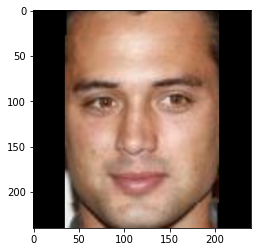

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [1]:
import os
from src.efficentnet_train import generate_dataset,utils,data_preprocessing


## Split Dataset

In [2]:
dataset_path="../dataset/preprocessed"


In [3]:
train_names, test_names=generate_dataset.split_data(dataset_path+"/img_celb_prep")

In [5]:
os.mkdir(dataset_path+"train")
for name in train_names:
    utils.copydir(f"{dataset_path}/img_celb_prep/{name}",f"{dataset_path}/train")
os.mkdir(dataset_path+"test")
for name in test_names:
    utils.copydir(f"{dataset_path}/img_celb_prep/{name}",f"{dataset_path}/test")

## remove invalid files

In [7]:
removed=data_preprocessing.remove_unknown_files(f"{dataset_path}/train")
print(f"no of removed files={removed}")
removed=data_preprocessing.remove_unknown_files(f"{dataset_path}/test")
print(f"no of removed files={removed}")

no of removed files=0
no of removed files=0


## meteaData

In [4]:
train_dataset_df=data_preprocessing.get_name_photos_list(f"{dataset_path}/train")
test_dataset_df=data_preprocessing.get_name_photos_list(f"{dataset_path}/test")

In [5]:
train_dataset_df.head()

,Name,no_photos
0,10044,29
1,10078,5
2,1009,19
3,10136,24
4,10162,24


In [6]:
test_dataset_df.head()

,Name,no_photos
0,1007,21
1,10091,19
2,10096,29
3,10154,23
4,10167,29


In [34]:
print(f"no of train identities={train_dataset_df['no_photos'].count()}")
train_photos_count=train_dataset_df['no_photos'].sum()
print(f"no of train photos={train_photos_count}")

print(f"mean of photo count for each identity={int(train_dataset_df['no_photos'].mean())}")
print()


print(f"no of test identities={test_dataset_df['no_photos'].count()}")
test_photos_count=test_dataset_df['no_photos'].sum()
print(f"no of test photos={test_photos_count}")
print(f"mean of photo count for each identity={int(test_dataset_df['no_photos'].mean())}")



no of train identities=860
no of train photos=16231
mean of photo count for each identity=18

no of test identities=214
no of test photos=4004
mean of photo count for each identity=18


 Calculate memory needed to load the images one time to increase the speed of training because we will have triplet of (anchor_image , postive_image , negative_image ) so loading of each photo will be more than one time if we save it in memory we will get the image faster

In [35]:
#mermory needed to load 16231 photo
photo_size=240*240
from_byte_to_mega = lambda x: x/(1024*1024)
print(f"train photos = {from_byte_to_mega(train_photos_count*photo_size*4)} mega byte")
print(f"test photos = {from_byte_to_mega(test_photos_count*photo_size*4)} mega byte")

train photos = 3566.3818359375 mega byte
test photos = 879.78515625 mega byte


In [33]:
print((16000*photo_size*4)/(1024**2))

3515.625
